In [378]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [379]:
df_read = pq.read_table('data/sim5k.pq').to_pandas()
df_read['stall'] = df_read['stall'].astype('category')

In [380]:
keep_cols = ['name',
             'altitude',
             'vertical_speed',
             'roll',
             'AOA',
             'airspeed',
             'flight_path_angle',
             'pitch',
             'stall']
df_features = df_read[keep_cols]

In [381]:
cols = [ 'altitude',
             'vertical_speed',
             'roll',
             'AOA',
             'airspeed',
             'flight_path_angle',
             'pitch']

In [382]:
estc = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [383]:
ssc = StandardScaler()

In [384]:
from sklearn.model_selection import train_test_split

flight_name = df_features['name'].unique()

trp, tsp = train_test_split(flight_name)

In [385]:
print("training {0} testing {1}".format(len(trp),len(tsp)))

training 3750 testing 1250


In [386]:
train_df_unscaled = df_features[df_read['name'].isin(trp)]
test_df_unscaled = df_features[df_read['name'].isin(tsp)]

In [387]:
train_df_unscaled

,name,altitude,vertical_speed,roll,AOA,airspeed,flight_path_angle,pitch,stall
3710,ABX227-8,19372.90,-1.04,0.00,0.00,443.89,-0.13,-0.13,0
3711,ABX227-8,19373.12,2.20,0.00,0.00,443.89,0.28,0.28,0
3712,ABX227-8,19372.85,-2.65,0.00,0.00,443.89,-0.34,-0.34,0
3713,ABX227-8,19372.84,-0.15,0.00,0.00,443.89,-0.02,-0.02,0
3714,ABX227-8,19373.06,2.21,0.00,0.00,443.89,0.29,0.29,0
...,...,...,...,...,...,...,...,...,...
44783,ABX451-96,11619.80,-24.30,0.71,151.68,436.43,-3.19,148.49,3
44784,ABX451-96,11617.84,-19.55,0.71,152.32,436.61,-2.57,149.75,3
44785,ABX451-96,11615.64,-22.05,0.71,152.96,435.40,-2.90,150.06,3
44786,ABX451-96,11613.21,-24.28,0.71,153.60,432.78,-3.22,150.38,3


In [388]:
train_df = ssc.fit_transform(train_df_unscaled[cols].values)
test_df = ssc.transform(test_df_unscaled[cols].values)

In [389]:
train_df_unscaled

,name,altitude,vertical_speed,roll,AOA,airspeed,flight_path_angle,pitch,stall
3710,ABX227-8,19372.90,-1.04,0.00,0.00,443.89,-0.13,-0.13,0
3711,ABX227-8,19373.12,2.20,0.00,0.00,443.89,0.28,0.28,0
3712,ABX227-8,19372.85,-2.65,0.00,0.00,443.89,-0.34,-0.34,0
3713,ABX227-8,19372.84,-0.15,0.00,0.00,443.89,-0.02,-0.02,0
3714,ABX227-8,19373.06,2.21,0.00,0.00,443.89,0.29,0.29,0
...,...,...,...,...,...,...,...,...,...
44783,ABX451-96,11619.80,-24.30,0.71,151.68,436.43,-3.19,148.49,3
44784,ABX451-96,11617.84,-19.55,0.71,152.32,436.61,-2.57,149.75,3
44785,ABX451-96,11615.64,-22.05,0.71,152.96,435.40,-2.90,150.06,3
44786,ABX451-96,11613.21,-24.28,0.71,153.60,432.78,-3.22,150.38,3


In [390]:
scaled_train_df = pd.DataFrame(train_df, index=train_df_unscaled[cols].index, columns=train_df_unscaled[cols].columns)

In [391]:
scaled_test_df = pd.DataFrame(test_df, index=test_df_unscaled[cols].index, columns=test_df_unscaled[cols].columns)

In [392]:
scaled_train_df

,altitude,vertical_speed,roll,AOA,airspeed,flight_path_angle,pitch
3710,-0.423330,0.310033,-0.684258,-0.671656,1.050242,0.327910,-0.670433
3711,-0.423310,0.658321,-0.684258,-0.671656,1.050242,0.570759,-0.662866
3712,-0.423334,0.136964,-0.684258,-0.671656,1.050242,0.203524,-0.674310
3713,-0.423335,0.405705,-0.684258,-0.671656,1.050242,0.393065,-0.668403
3714,-0.423315,0.659396,-0.684258,-0.671656,1.050242,0.576683,-0.662681
...,...,...,...,...,...,...,...
44783,-1.124424,-2.190331,1.551227,2.091032,0.964864,-1.484573,2.072777
44784,-1.124602,-1.679724,1.551227,2.102689,0.966924,-1.117338,2.096034
44785,-1.124801,-1.948465,1.551227,2.114346,0.953076,-1.312801,2.101756
44786,-1.125020,-2.188181,1.551227,2.126003,0.923091,-1.502342,2.107663


In [393]:
scaled_test_df

,altitude,vertical_speed,roll,AOA,airspeed,flight_path_angle,pitch
13834,-1.487316,0.147714,-0.684258,-0.671656,1.320681,0.221294,-0.673756
13835,-1.487333,0.211137,-0.684258,-0.671656,1.320681,0.262756,-0.672464
13836,-1.487308,0.726044,-0.684258,-0.671656,1.320681,0.612221,-0.661574
13837,-1.487314,0.349807,-0.684258,-0.671656,1.320681,0.357526,-0.669511
13838,-1.487336,0.161688,-0.684258,-0.671656,1.320681,0.227217,-0.673571
...,...,...,...,...,...,...,...
37914,-1.452646,-1.604476,1.551227,2.617779,-0.444554,-1.638575,2.601780
37915,-1.452764,-0.985297,1.551227,2.633078,-0.430248,-1.010721,2.636850
37916,-1.452967,-1.988238,1.551227,2.648378,-0.444096,-2.023579,2.620792
37917,-1.453102,-1.178791,1.551227,2.663678,-0.470877,-1.218031,2.661399


In [394]:
train_df_unscaled[['name','stall']]

,name,stall
3710,ABX227-8,0
3711,ABX227-8,0
3712,ABX227-8,0
3713,ABX227-8,0
3714,ABX227-8,0
...,...,...
44783,ABX451-96,3
44784,ABX451-96,3
44785,ABX451-96,3
44786,ABX451-96,3


In [395]:
scaled_train_df = pd.concat([scaled_train_df,train_df_unscaled[['name','stall']]], axis = 1)

In [396]:
scaled_test_df = pd.concat([scaled_test_df,test_df_unscaled[['name','stall']]], axis = 1)

In [397]:
scaled_test_df

,altitude,vertical_speed,roll,AOA,airspeed,flight_path_angle,pitch,name,stall
13834,-1.487316,0.147714,-0.684258,-0.671656,1.320681,0.221294,-0.673756,ABX227-30,0
13835,-1.487333,0.211137,-0.684258,-0.671656,1.320681,0.262756,-0.672464,ABX227-30,0
13836,-1.487308,0.726044,-0.684258,-0.671656,1.320681,0.612221,-0.661574,ABX227-30,0
13837,-1.487314,0.349807,-0.684258,-0.671656,1.320681,0.357526,-0.669511,ABX227-30,0
13838,-1.487336,0.161688,-0.684258,-0.671656,1.320681,0.227217,-0.673571,ABX227-30,0
...,...,...,...,...,...,...,...,...,...
37914,-1.452646,-1.604476,1.551227,2.617779,-0.444554,-1.638575,2.601780,ABX451-81,3
37915,-1.452764,-0.985297,1.551227,2.633078,-0.430248,-1.010721,2.636850,ABX451-81,3
37916,-1.452967,-1.988238,1.551227,2.648378,-0.444096,-2.023579,2.620792,ABX451-81,3
37917,-1.453102,-1.178791,1.551227,2.663678,-0.470877,-1.218031,2.661399,ABX451-81,3


In [398]:
train_df

array([[-0.42332989,  0.31003333, -0.68425807, ...,  1.05024203,
         0.32791042, -0.6704334 ],
       [-0.42331   ,  0.65832143, -0.68425807, ...,  1.05024203,
         0.57075946, -0.66286567],
       [-0.42333441,  0.13696424, -0.68425807, ...,  1.05024203,
         0.20352432, -0.67430955],
       ...,
       [-1.12480061, -1.94846453,  1.55122704, ...,  0.95307629,
        -1.31280141,  2.10175605],
       [-1.12502035, -2.18818134,  1.55122704, ...,  0.9230911 ,
        -1.50234212,  2.10766257],
       [-1.12514514, -1.06054486,  1.55122704, ...,  0.97024338,
        -0.66717834,  2.14550123]])

In [399]:
test_df = ssc.transform(test_df_unscaled[cols])

In [400]:
back_window = 10 # in secs
forward_window = 10 # stall is going to happen in next 20 sec
shift = 1

In [401]:
train_df

array([[-0.42332989,  0.31003333, -0.68425807, ...,  1.05024203,
         0.32791042, -0.6704334 ],
       [-0.42331   ,  0.65832143, -0.68425807, ...,  1.05024203,
         0.57075946, -0.66286567],
       [-0.42333441,  0.13696424, -0.68425807, ...,  1.05024203,
         0.20352432, -0.67430955],
       ...,
       [-1.12480061, -1.94846453,  1.55122704, ...,  0.95307629,
        -1.31280141,  2.10175605],
       [-1.12502035, -2.18818134,  1.55122704, ...,  0.9230911 ,
        -1.50234212,  2.10766257],
       [-1.12514514, -1.06054486,  1.55122704, ...,  0.97024338,
        -0.66717834,  2.14550123]])

In [501]:
scaled_train_df.iloc[:,0:8]

,altitude,vertical_speed,roll,AOA,airspeed,flight_path_angle,pitch,name
3710,-0.423330,0.310033,-0.684258,-0.671656,1.050242,0.327910,-0.670433,ABX227-8
3711,-0.423310,0.658321,-0.684258,-0.671656,1.050242,0.570759,-0.662866,ABX227-8
3712,-0.423334,0.136964,-0.684258,-0.671656,1.050242,0.203524,-0.674310,ABX227-8
3713,-0.423335,0.405705,-0.684258,-0.671656,1.050242,0.393065,-0.668403,ABX227-8
3714,-0.423315,0.659396,-0.684258,-0.671656,1.050242,0.576683,-0.662681,ABX227-8
...,...,...,...,...,...,...,...,...
44783,-1.124424,-2.190331,1.551227,2.091032,0.964864,-1.484573,2.072777,ABX451-96
44784,-1.124602,-1.679724,1.551227,2.102689,0.966924,-1.117338,2.096034,ABX451-96
44785,-1.124801,-1.948465,1.551227,2.114346,0.953076,-1.312801,2.101756,ABX451-96
44786,-1.125020,-2.188181,1.551227,2.126003,0.923091,-1.502342,2.107663,ABX451-96


In [502]:
x_tr = [] # inputs
y_tr = [] # outputs
for p in trp:
    pt = scaled_train_df[scaled_train_df['name'] == p]
    for t in range(back_window, len(pt)):
        # input variables
        x_tr.append(pt[t-back_window:t-1].iloc[:,0:7])
        # output variable
        x_df = pt.iloc[t]
        if (x_df['stall'] > 0):
            y_tr.append(1)
        else:
            y_tr.append(0)

In [503]:
x_ts = [] # inputs
y_ts = [] # outputs
for p in tsp:
    pt = scaled_test_df[scaled_test_df['name'] == p]
    for t in range(back_window, len(pt)):
        # input variables
        x_ts.append(pt[t-back_window:t-1].iloc[:,0:7])
    
        # output variable
        x_df = pt.iloc[t]
        if (x_df['stall'] > 0):
            y_ts.append(1)
        else:
            y_ts.append(0)

In [504]:
values, counts = np.unique(y_tr, return_counts=True)
print(values, counts)

[0 1] [ 526628 1160012]


In [505]:
values, counts = np.unique(y_ts, return_counts=True)
print(values, counts)

[0 1] [175539 388419]


In [506]:
x_tr_vals = np.array([xx.values for xx in x_tr])
x_ts_vals = np.array([xx.values for xx in x_ts])

In [507]:
y_tr_vals = np.array(y_tr)
y_ts_vals = np.array(y_ts)

In [508]:
x_tr_vals

array([[[-1.06359285, -0.10382754, -0.68425807, ..., -0.30183818,
         -0.10447934, -0.68390765],
        [-1.06355397,  0.88621364, -0.68425807, ..., -0.30183818,
          0.85507053, -0.65400588],
        [-1.06358381,  0.05956688, -0.68425807, ..., -0.30183818,
          0.05544564, -0.67892402],
        ...,
        [-1.06354673,  0.18426262, -0.68425807, ..., -0.30183818,
          0.17390858, -0.67523245],
        [-1.06353407,  0.57447429, -0.68425807, ..., -0.30183818,
          0.55299002, -0.6634194 ],
        [-1.06355487,  0.17566292, -0.68425807, ..., -0.30183818,
          0.16798544, -0.67541703]],

       [[-1.06355397,  0.88621364, -0.68425807, ..., -0.30183818,
          0.85507053, -0.65400588],
        [-1.06358381,  0.05956688, -0.68425807, ..., -0.30183818,
          0.05544564, -0.67892402],
        [-1.06358562,  0.40785498, -0.68425807, ..., -0.30183818,
          0.39306504, -0.66840303],
        ...,
        [-1.06353407,  0.57447429, -0.68425807, ..., -

In [509]:
n_timesteps, n_features = x_tr_vals.shape[1], x_tr_vals.shape[2]

In [510]:
elix_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(29, input_shape=(n_timesteps,n_features)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

elix_lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [511]:
elix_lstm_model.fit(x_tr_vals, y_tr_vals, epochs=10,
                      steps_per_epoch=None)

Epoch 1/10
52708/52708 [==============================] - 234s 4ms/step - loss: 0.1086 - accuracy: 0.9611
Epoch 2/10
52708/52708 [==============================] - 234s 4ms/step - loss: 0.1022 - accuracy: 0.9640
Epoch 3/10
52708/52708 [==============================] - 234s 4ms/step - loss: 0.1011 - accuracy: 0.9644
Epoch 4/10
52708/52708 [==============================] - 235s 4ms/step - loss: 0.1004 - accuracy: 0.9647
Epoch 5/10
52708/52708 [==============================] - 237s 4ms/step - loss: 0.0999 - accuracy: 0.9650
Epoch 6/10
52708/52708 [==============================] - 238s 5ms/step - loss: 0.0996 - accuracy: 0.9650
Epoch 7/10
52708/52708 [==============================] - 239s 5ms/step - loss: 0.0992 - accuracy: 0.9652
Epoch 8/10
52708/52708 [==============================] - 239s 5ms/step - loss: 0.0991 - accuracy: 0.9653
Epoch 9/10
52708/52708 [==============================] - 241s 5ms/step - loss: 0.0989 - accuracy: 0.9654
Epoch 10/10
52708/52708 [=====================

In [512]:
print(elix_lstm_model)

In [513]:
predict_prob  = elix_lstm_model.predict_classes(x_ts_vals)

In [514]:
y_pred = np.concatenate(predict_prob)

In [515]:
matrix = confusion_matrix(y_ts_vals, y_pred)

In [516]:
matrix

array([[170745,   4794],
       [ 14699, 373720]])

In [517]:
_, accuracy = elix_lstm_model.evaluate(x_ts_vals, y_ts_vals, verbose = 0)

In [518]:
print(accuracy)

0.9654353857040405


In [519]:
target_names = ['No Stall', 'Stall']

In [520]:
from sklearn.metrics import classification_report
print(classification_report(y_ts_vals, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    No Stall       0.92      0.97      0.95    175539
       Stall       0.99      0.96      0.97    388419

    accuracy                           0.97    563958
   macro avg       0.95      0.97      0.96    563958
weighted avg       0.97      0.97      0.97    563958



### Analysis of prediction

In [1006]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns
def plot(sim_df, stall_time = 0,predicted_time = 0):
    df_time = range(0,sim_df.shape[0])
    fig, axs = plt.subplots(ncols=1, nrows=7, figsize=(18,10), sharex=True)
    plt1 = sns.lineplot(x='time', y='altitude', data=sim_df, ax=axs[0])
    if predicted_time > 0:
        plt1.axvline(predicted_time, color='green')
    plt1.axvline(stall_time, color='red')
    
    plt1 = sns.lineplot(x='time', y='vertical_speed', data=sim_df, ax=axs[1])
    plt1.axhline(0, color='black')
    plt1.axvline(stall_time, color='red')
    if predicted_time > 0:
        plt1.axvline(predicted_time, color='green')
    
    plt1 = sns.lineplot(x='time', y='roll', data=sim_df, ax=axs[2])
    plt1.axvline(stall_time, color='red')
    if predicted_time > 0:
        plt1.axvline(predicted_time, color='green')
    
    plt1 = sns.lineplot(x='time', y='AOA', data=sim_df, ax=axs[3])
    plt1.axvline(stall_time, color='red')
    if predicted_time > 0:
        plt1.axvline(predicted_time, color='green')
    
    plt1 = sns.lineplot(x='time', y='flight_path_angle', data=sim_df, ax=axs[4])
    plt1.axvline(stall_time, color='red')
    if predicted_time > 0:
        plt1.axvline(predicted_time, color='green')
        
    plt1 = sns.lineplot(x='time', y='pitch', data=sim_df, ax=axs[5])
    plt1.axvline(stall_time, color='red')
    if predicted_time > 0:
        plt1.axvline(predicted_time, color='green')
        
    plt1 = sns.lineplot(x='time', y='airspeed', data=sim_df, ax=axs[6])
    plt1.axvline(stall_time, color='red')
    if predicted_time > 0:
        plt1.axvline(predicted_time, color='green')

In [522]:
y_ts.index(1)

141

In [523]:
x_ts[141]

,altitude,vertical_speed,roll,AOA,airspeed,flight_path_angle,pitch
39031,-0.032946,0.284234,-0.684258,-0.671656,-1.499529,0.209447,-0.674125
39032,-0.032931,0.598123,-0.684258,-0.671656,-1.499529,0.653684,-0.660282
39033,-0.032908,0.705620,-0.684258,-0.671656,-1.499529,0.807685,-0.655483
39034,-0.032951,-0.096303,-0.684258,-0.671656,-1.499529,-0.335482,-0.691106
39035,-0.032934,0.626073,-0.684258,-0.671656,-1.499529,0.695146,-0.658990
39036,-0.032938,0.367006,-0.684258,-0.671656,-1.499529,0.327910,-0.670433
39037,-0.032936,0.449779,-0.684258,-0.671656,-1.499529,0.446373,-0.666742
39038,-0.032905,0.794842,-0.684258,-0.671656,-1.499529,0.937995,-0.651422
39039,-0.032944,-0.045780,-0.684258,-0.671656,-1.499529,-0.264404,-0.688891


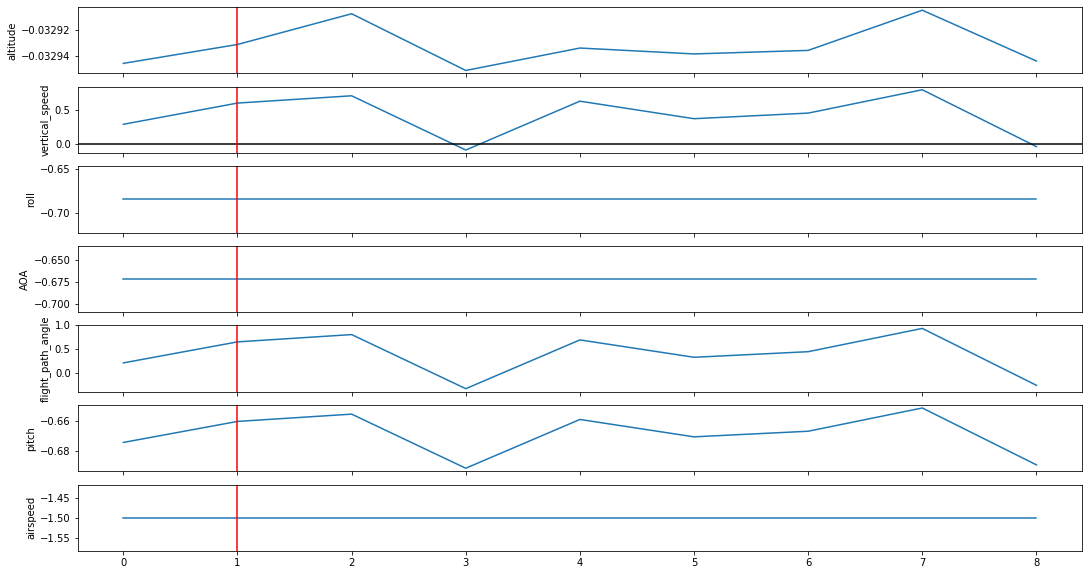

In [601]:
time = range(1,10)
stall_time = 1
plot(x_ts[141])

In [595]:
print(x_ts[141].shape[0])

9


In [525]:
y_pred.tolist().index(1)

145

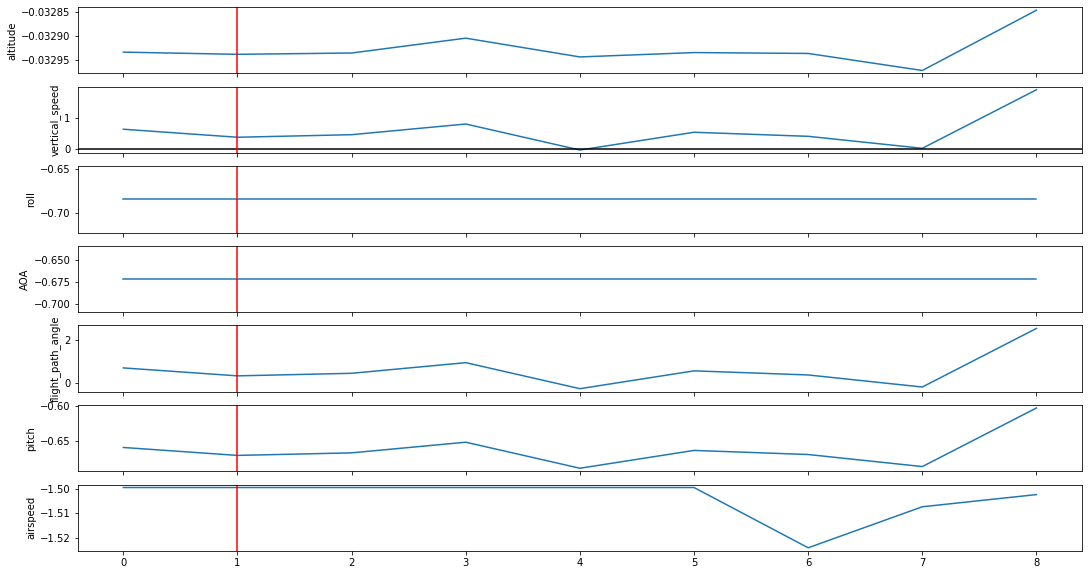

In [602]:
time = range(1,10)
stall_time = 1
plot(x_ts[145])

In [527]:
tsp[100]

'ABX433-63'

In [606]:
scaled_test_df[scaled_test_df.name == 'ABX433-63'].iloc[:,0:7]

,altitude,vertical_speed,roll,AOA,airspeed,flight_path_angle,pitch
28459,0.763338,0.148789,-0.684258,-0.671656,-1.287000,0.043599,-0.679293
28460,0.763339,0.434729,-0.684258,-0.671656,-1.287000,0.422681,-0.667480
28461,0.763358,0.648647,-0.684258,-0.671656,-1.287000,0.701069,-0.658805
28462,0.763354,0.370231,-0.684258,-0.671656,-1.287000,0.333834,-0.670249
28463,0.763321,0.030543,-0.684258,-0.671656,-1.287000,-0.110402,-0.684092
...,...,...,...,...,...,...,...
28964,0.751087,-0.401592,1.551227,4.406386,-1.330033,-0.696794,4.443692
28965,0.750989,-0.758480,1.551227,4.421868,-1.279447,-1.146953,4.445353
28966,0.750862,-1.079894,1.551227,4.437350,-1.338731,-1.614882,4.446461
28967,0.750790,-0.434916,1.551227,4.452831,-1.309318,-0.732333,4.489652


In [613]:
scaled_test_df['stall'].tolist().index(1)

150

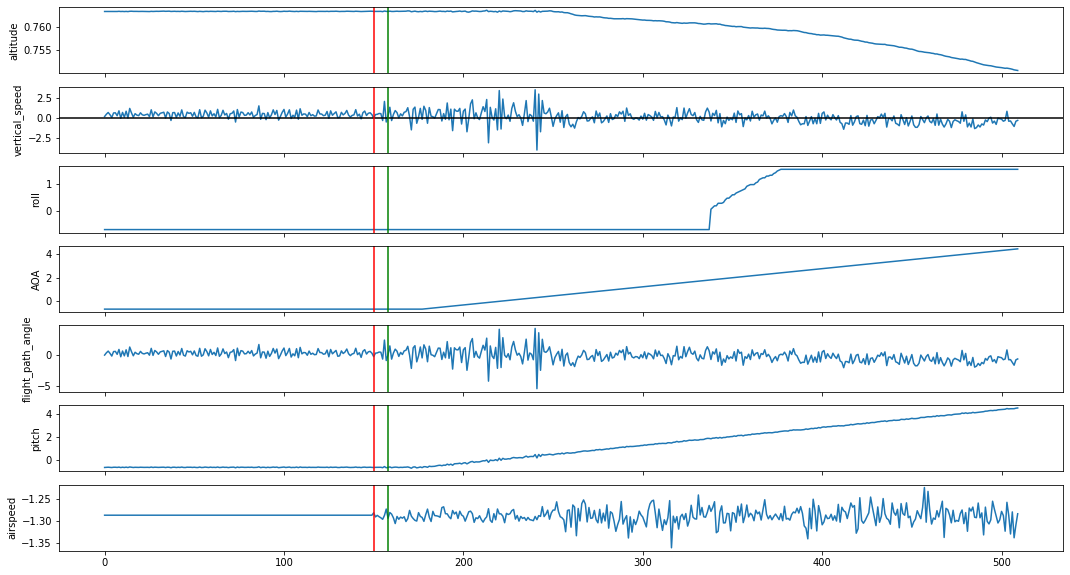

In [724]:
plot(scaled_test_df[scaled_test_df.name == 'ABX433-63'].iloc[:,0:7],scaled_test_df['stall'].tolist().index(1),158)

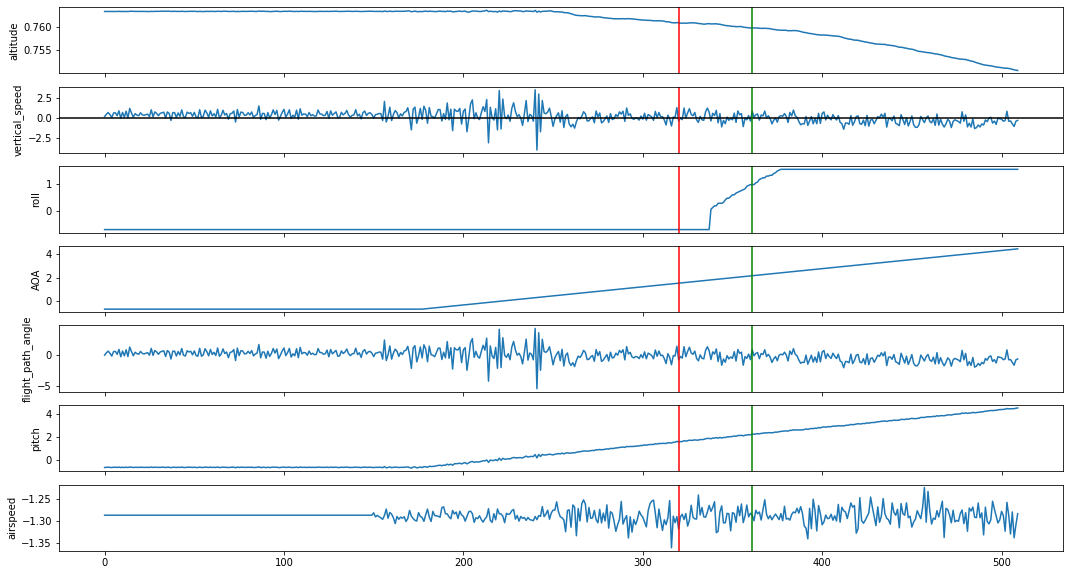

In [725]:
plot(scaled_test_df[scaled_test_df.name == 'ABX433-63'].iloc[:,0:7],320,361)

In [617]:
flight_features = [] # inputs
flight_preds = [] # outputs

print(p)
pt = scaled_test_df[scaled_test_df['name'] == 'ABX433-63']
print(pt)
for t in range(back_window, len(pt)):
    # input variables
    flight_features.append(pt[t-back_window:t-1].iloc[:,0:7])

    # output variable
    flight_df = pt.iloc[t]
    if (flight_df['stall'] > 0):
        flight_preds.append(1)
    else:
        flight_preds.append(0)

3
       altitude  vertical_speed      roll       AOA  airspeed  \
28459  0.763338        0.148789 -0.684258 -0.671656 -1.287000   
28460  0.763339        0.434729 -0.684258 -0.671656 -1.287000   
28461  0.763358        0.648647 -0.684258 -0.671656 -1.287000   
28462  0.763354        0.370231 -0.684258 -0.671656 -1.287000   
28463  0.763321        0.030543 -0.684258 -0.671656 -1.287000   
...         ...             ...       ...       ...       ...   
28964  0.751087       -0.401592  1.551227  4.406386 -1.330033   
28965  0.750989       -0.758480  1.551227  4.421868 -1.279447   
28966  0.750862       -1.079894  1.551227  4.437350 -1.338731   
28967  0.750790       -0.434916  1.551227  4.452831 -1.309318   
28968  0.750727       -0.328495  1.551227  4.468313 -1.283681   

       flight_path_angle     pitch       name stall  
28459           0.043599 -0.679293  ABX433-63     0  
28460           0.422681 -0.667480  ABX433-63     0  
28461           0.701069 -0.658805  ABX433-63     0  
2

In [618]:
flight_preds

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [620]:
flight_features_vals = np.array([xx.values for xx in flight_features])

In [681]:
flight_class_predicted  = elix_lstm_model.predict_classes(flight_features_vals)

In [717]:
scaled_test_df[scaled_test_df['name'] == 'ABX433-63'].stall.tolist().index(1)

150

In [682]:
flight_class_predicted = np.concatenate(flight_class_predicted)

In [683]:
flight_class_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [684]:
np.where(flight_class_predicted == 1)[0]

array([ 85,  86,  87, 148, 149, 150, 151, 152, 153, 154, 155, 156, 161,
       162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
       175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
       188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200,
       201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,
       214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226,
       227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239,
       240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252,
       253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265,
       266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278,
       279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291,
       292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304,
       305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317,
       318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 32

In [645]:
len(np.where(flight_class_predicted == 1)[0])  > 0

True

In [641]:
np.concatenate(flight_class_predicted)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Including forward window
### Target variable based on uncommanded roll and uncommanded decent

In [656]:
forward_window = 200

In [662]:
x_tr = [] # inputs
y_tr = [] # outputs
for p in trp:
    pt = scaled_train_df[scaled_train_df['name'] == p]
    for t in range(back_window, len(pt)):
        # input variables
        x_tr.append(pt[t-back_window:t-1].iloc[:,0:7])
        # output variable
        x_df = pt.iloc[t]
        #target variable based on uncommanded roll and uncommanded decent
        if (len(np.where(pt[t:t+forward_window].stall == 3)[0] > 0)):
            y_tr.append(1)
        else:
            y_tr.append(0)

In [663]:
x_ts = [] # inputs
y_ts = [] # outputs
for p in tsp:
    pt = scaled_test_df[scaled_test_df['name'] == p]
    for t in range(back_window, len(pt)):
        # input variables
        x_ts.append(pt[t-back_window:t-1].iloc[:,0:7])
    
        # output variable
        x_df = pt.iloc[t]
        if (len(np.where(pt[t:t+forward_window].stall == 3)[0] > 0)):
            y_ts.append(1)
        else:
            y_ts.append(0)

In [664]:
x_tr_vals = np.array([xx.values for xx in x_tr])
x_ts_vals = np.array([xx.values for xx in x_ts])
y_tr_vals = np.array(y_tr)
y_ts_vals = np.array(y_ts)
n_timesteps, n_features = x_tr_vals.shape[1], x_tr_vals.shape[2]

In [665]:
lstm_model_forward_200 = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(29, input_shape=(n_timesteps,n_features)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

lstm_model_forward_200.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [666]:
lstm_model_forward_200.fit(x_tr_vals, y_tr_vals, epochs=10,
                      steps_per_epoch=None)

Epoch 1/10
52708/52708 [==============================] - 240s 5ms/step - loss: 0.2243 - accuracy: 0.9099
Epoch 2/10
52708/52708 [==============================] - 239s 5ms/step - loss: 0.2173 - accuracy: 0.9135
Epoch 3/10
52708/52708 [==============================] - 240s 5ms/step - loss: 0.2156 - accuracy: 0.9142
Epoch 4/10
52708/52708 [==============================] - 242s 5ms/step - loss: 0.2146 - accuracy: 0.9146
Epoch 5/10
52708/52708 [==============================] - 240s 5ms/step - loss: 0.2138 - accuracy: 0.9150
Epoch 6/10
52708/52708 [==============================] - 241s 5ms/step - loss: 0.2134 - accuracy: 0.9151
Epoch 7/10
52708/52708 [==============================] - 1896s 36ms/step - loss: 0.2129 - accuracy: 0.9154
Epoch 8/10
52708/52708 [==============================] - 242s 5ms/step - loss: 0.2125 - accuracy: 0.9155
Epoch 9/10
52708/52708 [==============================] - 242s 5ms/step - loss: 0.2123 - accuracy: 0.9156
Epoch 10/10
52708/52708 [===================

In [667]:
predict_prob  = lstm_model_forward_200.predict_classes(x_ts_vals)
y_pred = np.concatenate(predict_prob)

In [668]:
matrix = confusion_matrix(y_ts_vals, y_pred)

In [672]:
matrix

array([[164282,  17697],
       [ 30473, 351506]])

In [669]:
_, accuracy = lstm_model_forward_200.evaluate(x_ts_vals, y_ts_vals, verbose = 0)
print(accuracy)

0.9145858287811279


In [670]:
target_names = ['No Stall', 'Stall']

In [671]:
from sklearn.metrics import classification_report
print(classification_report(y_ts_vals, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    No Stall       0.84      0.90      0.87    181979
       Stall       0.95      0.92      0.94    381979

    accuracy                           0.91    563958
   macro avg       0.90      0.91      0.90    563958
weighted avg       0.92      0.91      0.92    563958



In [673]:
flight_features = [] # inputs
flight_preds = [] # outputs

print(p)
pt = scaled_test_df[scaled_test_df['name'] == 'ABX433-63']
print(pt)
for t in range(back_window, len(pt)):
    # input variables
    flight_features.append(pt[t-back_window:t-1].iloc[:,0:7])

    # output variable
    flight_df = pt.iloc[t]
    if (len(np.where(pt[t:t+forward_window].stall == 3)[0] > 0)):
        flight_preds.append(1)
    else:
        flight_preds.append(0)

ABX188-13
       altitude  vertical_speed      roll       AOA  airspeed  \
28459  0.763338        0.148789 -0.684258 -0.671656 -1.287000   
28460  0.763339        0.434729 -0.684258 -0.671656 -1.287000   
28461  0.763358        0.648647 -0.684258 -0.671656 -1.287000   
28462  0.763354        0.370231 -0.684258 -0.671656 -1.287000   
28463  0.763321        0.030543 -0.684258 -0.671656 -1.287000   
...         ...             ...       ...       ...       ...   
28964  0.751087       -0.401592  1.551227  4.406386 -1.330033   
28965  0.750989       -0.758480  1.551227  4.421868 -1.279447   
28966  0.750862       -1.079894  1.551227  4.437350 -1.338731   
28967  0.750790       -0.434916  1.551227  4.452831 -1.309318   
28968  0.750727       -0.328495  1.551227  4.468313 -1.283681   

       flight_path_angle     pitch       name stall  
28459           0.043599 -0.679293  ABX433-63     0  
28460           0.422681 -0.667480  ABX433-63     0  
28461           0.701069 -0.658805  ABX433-63  

In [708]:
values, counts = np.unique(flight_preds, return_counts=True)
print(values, counts)

[0 1] [111 389]


In [711]:
scaled_test_df[scaled_test_df['name'] == 'ABX433-63'].stall.tolist().index(3)

320

In [710]:
values, counts = np.unique(scaled_test_df[scaled_test_df['name'] == 'ABX433-63'].stall.tolist(), return_counts=True)
print(values, counts)

[0 1 2 3] [150  28 142 190]


28459    0
28460    0
28461    0
28462    0
28463    0
        ..
28964    3
28965    3
28966    3
28967    3
28968    3
Name: stall, Length: 510, dtype: category
Categories (4, int64): [0, 1, 2, 3]

In [674]:
flight_features_vals = np.array([xx.values for xx in flight_features])

In [713]:
flight_class_predicted  = lstm_model_forward_200.predict_classes(flight_features_vals)

In [715]:
flight_class_predicted

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [716]:
np.where(flight_class_predicted == 1)[0]

array([ 85,  86,  87, 151, 152, 153, 154, 155, 156, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203,
       204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
       217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229,
       230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242,
       243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255,
       256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268,
       269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281,
       282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294,
       295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307,
       308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320,
       321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 33

In [680]:
np.where(flight_class_predicted == 1)[0]

array([ 85,  86,  87, 151, 152, 153, 154, 155, 156, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203,
       204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
       217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229,
       230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242,
       243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255,
       256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268,
       269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281,
       282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294,
       295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307,
       308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320,
       321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 33

In [706]:
np.where(scaled_test_df[scaled_test_df['name'] == 'ABX433-63'].stall == 3)[0]

array([320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332,
       333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345,
       346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358,
       359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371,
       372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384,
       385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397,
       398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410,
       411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423,
       424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436,
       437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449,
       450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462,
       463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475,
       476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488,
       489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 50

In [704]:
scaled_test_df[(scaled_test_df.name == "ABX433-63") & (scaled_test_df.stall ==  3)]

,altitude,vertical_speed,roll,AOA,airspeed,flight_path_angle,pitch,name,stall
28779,0.760897,-0.422017,-0.684258,1.542247,-1.318817,-0.720487,1.540452,ABX433-63,3
28780,0.760860,-0.022130,-0.684258,1.557729,-1.290548,-0.181480,1.572938,ABX433-63,3
28781,0.760805,-0.231748,-0.684258,1.573210,-1.284940,-0.453945,1.580136,ABX433-63,3
28782,0.760870,1.199028,-0.684258,1.588692,-1.296957,1.429616,1.654522,ABX433-63,3
28783,0.760830,-0.052229,-0.684258,1.604174,-1.283224,-0.217019,1.618898,ABX433-63,3
...,...,...,...,...,...,...,...,...,...
28964,0.751087,-0.401592,1.551227,4.406386,-1.330033,-0.696794,4.443692,ABX433-63,3
28965,0.750989,-0.758480,1.551227,4.421868,-1.279447,-1.146953,4.445353,ABX433-63,3
28966,0.750862,-1.079894,1.551227,4.437350,-1.338731,-1.614882,4.446461,ABX433-63,3
28967,0.750790,-0.434916,1.551227,4.452831,-1.309318,-0.732333,4.489652,ABX433-63,3


## Including forward window
### Target variable based on Class 2

In [731]:
forward_window = 100

200

In [732]:
x_tr = [] # inputs
y_tr = [] # outputs
for p in trp:
    pt = scaled_train_df[scaled_train_df['name'] == p]
    for t in range(back_window, len(pt)):
        # input variables
        x_tr.append(pt[t-back_window:t-1].iloc[:,0:7])
        # output variable
        x_df = pt.iloc[t]
        #target variable based on uncommanded roll and uncommanded decent
        if (len(np.where(pt[t:t+forward_window].stall == 2)[0] > 0)):
            y_tr.append(1)
        else:
            y_tr.append(0)

In [733]:
x_ts = [] # inputs
y_ts = [] # outputs
for p in tsp:
    pt = scaled_test_df[scaled_test_df['name'] == p]
    for t in range(back_window, len(pt)):
        # input variables
        x_ts.append(pt[t-back_window:t-1].iloc[:,0:7])
    
        # output variable
        x_df = pt.iloc[t]
        if (len(np.where(pt[t:t+forward_window].stall == 2)[0] > 0)):
            y_ts.append(1)
        else:
            y_ts.append(0)

In [734]:
x_tr_vals = np.array([xx.values for xx in x_tr])
x_ts_vals = np.array([xx.values for xx in x_ts])
y_tr_vals = np.array(y_tr)
y_ts_vals = np.array(y_ts)
n_timesteps, n_features = x_tr_vals.shape[1], x_tr_vals.shape[2]

In [735]:
lstm_model_forward_200_class_2 = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(29, input_shape=(n_timesteps,n_features)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

lstm_model_forward_200_class_2.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [736]:
lstm_model_forward_200_class_2.fit(x_tr_vals, y_tr_vals, epochs=10,
                      steps_per_epoch=None)

Epoch 1/10
52708/52708 [==============================] - 244s 5ms/step - loss: 0.1868 - accuracy: 0.9356
Epoch 2/10
52708/52708 [==============================] - 247s 5ms/step - loss: 0.1834 - accuracy: 0.9364
Epoch 3/10
52708/52708 [==============================] - 246s 5ms/step - loss: 0.1817 - accuracy: 0.9367
Epoch 4/10
52708/52708 [==============================] - 245s 5ms/step - loss: 0.1804 - accuracy: 0.9370
Epoch 5/10
52708/52708 [==============================] - 247s 5ms/step - loss: 0.1793 - accuracy: 0.9373
Epoch 6/10
52708/52708 [==============================] - 246s 5ms/step - loss: 0.1785 - accuracy: 0.9374
Epoch 7/10
52708/52708 [==============================] - 246s 5ms/step - loss: 0.1775 - accuracy: 0.9377
Epoch 8/10
52708/52708 [==============================] - 245s 5ms/step - loss: 0.1768 - accuracy: 0.9380
Epoch 9/10
52708/52708 [==============================] - 244s 5ms/step - loss: 0.1761 - accuracy: 0.9381
Epoch 10/10
52708/52708 [=====================

In [737]:
predict_prob  = lstm_model_forward_200_class_2.predict_classes(x_ts_vals)
y_pred = np.concatenate(predict_prob)

In [738]:
matrix = confusion_matrix(y_ts_vals, y_pred)
matrix

array([[121646,  21334],
       [ 15485, 405493]])

In [739]:
_, accuracy = lstm_model_forward_200_class_2.evaluate(x_ts_vals, y_ts_vals, verbose = 0)
print(accuracy)

0.9347132444381714


In [740]:
target_names = ['No Stall', 'Stall']

In [741]:
from sklearn.metrics import classification_report
print(classification_report(y_ts_vals, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    No Stall       0.89      0.85      0.87    142980
       Stall       0.95      0.96      0.96    420978

    accuracy                           0.93    563958
   macro avg       0.92      0.91      0.91    563958
weighted avg       0.93      0.93      0.93    563958



In [742]:
flight_features = [] # inputs
flight_preds = [] # outputs

print(p)
pt = scaled_test_df[scaled_test_df['name'] == 'ABX433-63']
print(pt)
for t in range(back_window, len(pt)):
    # input variables
    flight_features.append(pt[t-back_window:t-1].iloc[:,0:7])

    # output variable
    flight_df = pt.iloc[t]
    if (len(np.where(pt[t:t+forward_window].stall == 2)[0] > 0)):
        flight_preds.append(1)
    else:
        flight_preds.append(0)

ABX188-13
       altitude  vertical_speed      roll       AOA  airspeed  \
28459  0.763338        0.148789 -0.684258 -0.671656 -1.287000   
28460  0.763339        0.434729 -0.684258 -0.671656 -1.287000   
28461  0.763358        0.648647 -0.684258 -0.671656 -1.287000   
28462  0.763354        0.370231 -0.684258 -0.671656 -1.287000   
28463  0.763321        0.030543 -0.684258 -0.671656 -1.287000   
...         ...             ...       ...       ...       ...   
28964  0.751087       -0.401592  1.551227  4.406386 -1.330033   
28965  0.750989       -0.758480  1.551227  4.421868 -1.279447   
28966  0.750862       -1.079894  1.551227  4.437350 -1.338731   
28967  0.750790       -0.434916  1.551227  4.452831 -1.309318   
28968  0.750727       -0.328495  1.551227  4.468313 -1.283681   

       flight_path_angle     pitch       name stall  
28459           0.043599 -0.679293  ABX433-63     0  
28460           0.422681 -0.667480  ABX433-63     0  
28461           0.701069 -0.658805  ABX433-63  

In [743]:
values, counts = np.unique(flight_preds, return_counts=True)
print(values, counts)

[0 1] [190 310]


In [744]:
scaled_test_df[scaled_test_df['name'] == 'ABX433-63'].stall.tolist().index(2)

178

In [745]:
flight_features_vals = np.array([xx.values for xx in flight_features])

In [746]:
flight_class_predicted  = lstm_model_forward_200_class_2.predict_classes(flight_features_vals)

In [747]:
np.where(flight_class_predicted == 1)[0]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

## Including forward window
### Including all the classes in the window

In [750]:
stall_list = [1,2,3]

In [760]:
flight_list = scaled_test_df[scaled_test_df['name'] == 'ABX433-63'].stall.tolist()[0:321]

In [761]:
all(elem in flight_list for elem in stall_list)

True

In [778]:
x_tr = [] # inputs
y_tr = [] # outputs
for p in trp:
    pt = scaled_train_df[scaled_train_df['name'] == p]
    for t in range(back_window, len(pt)):
        # input variables
        x_tr.append(pt[t-back_window:t-1].iloc[:,0:7])
        # output variable
        x_df = pt.iloc[t]
        #target variable based on uncommanded roll and uncommanded decent
        flight_list = pt[t:t+forward_window].stall.tolist()
        if (all(elem in flight_list for elem in stall_list) or len(np.where(pt[t:t+forward_window].stall == 3)[0] > 0)):
            y_tr.append(1)
        else:
            y_tr.append(0)

In [779]:
x_ts = [] # inputs
y_ts = [] # outputs
for p in tsp:
    pt = scaled_test_df[scaled_test_df['name'] == p]
    for t in range(back_window, len(pt)):
        # input variables
        x_ts.append(pt[t-back_window:t-1].iloc[:,0:7])
    
        # output variable
        x_df = pt.iloc[t]
        flight_list = pt[t:t+forward_window].stall.tolist()
        if (all(elem in flight_list for elem in stall_list) or len(np.where(pt[t:t+forward_window].stall == 3)[0] > 0)):
            y_ts.append(1)
        else:
            y_ts.append(0)

In [782]:
x_tr_vals = np.array([xx.values for xx in x_tr])
x_ts_vals = np.array([xx.values for xx in x_ts])
y_tr_vals = np.array(y_tr)
y_ts_vals = np.array(y_ts)
n_timesteps, n_features = x_tr_vals.shape[1], x_tr_vals.shape[2]

In [783]:
values, counts = np.unique(y_ts, return_counts=True)
print(values, counts)

[0 1] [181979 381979]


In [784]:
lstm_model_forward_200_all_classes = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(29, input_shape=(n_timesteps,n_features)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

lstm_model_forward_200_all_classes.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [785]:
lstm_model_forward_200_all_classes.fit(x_tr_vals, y_tr_vals, epochs=10,
                      steps_per_epoch=None)

Epoch 1/10
52708/52708 [==============================] - 250s 5ms/step - loss: 0.2239 - accuracy: 0.9101
Epoch 2/10
52708/52708 [==============================] - 250s 5ms/step - loss: 0.2171 - accuracy: 0.9134
Epoch 3/10
52708/52708 [==============================] - 249s 5ms/step - loss: 0.2154 - accuracy: 0.9143
Epoch 4/10
52708/52708 [==============================] - 249s 5ms/step - loss: 0.2144 - accuracy: 0.9146
Epoch 5/10
52708/52708 [==============================] - 248s 5ms/step - loss: 0.2137 - accuracy: 0.9151
Epoch 6/10
52708/52708 [==============================] - 249s 5ms/step - loss: 0.2132 - accuracy: 0.9152
Epoch 7/10
52708/52708 [==============================] - 241s 5ms/step - loss: 0.2127 - accuracy: 0.9153
Epoch 8/10
52708/52708 [==============================] - 229s 4ms/step - loss: 0.2124 - accuracy: 0.9155
Epoch 9/10
52708/52708 [==============================] - 230s 4ms/step - loss: 0.2121 - accuracy: 0.9156
Epoch 10/10
52708/52708 [=====================

In [786]:
predict_prob  = lstm_model_forward_200_all_classes.predict_classes(x_ts_vals)
y_pred = np.concatenate(predict_prob)

In [787]:
matrix = confusion_matrix(y_ts_vals, y_pred)
matrix

array([[163278,  18701],
       [ 29571, 352408]])

In [788]:
from sklearn.metrics import classification_report
print(classification_report(y_ts_vals, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    No Stall       0.85      0.90      0.87    181979
       Stall       0.95      0.92      0.94    381979

    accuracy                           0.91    563958
   macro avg       0.90      0.91      0.90    563958
weighted avg       0.92      0.91      0.92    563958



In [792]:
scaled_test_df[scaled_test_df['name'] == 'ABX433-63'].stall

,altitude,vertical_speed,roll,AOA,airspeed,flight_path_angle,pitch
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.760768,0.127325,0.014416,1.006393,-1.288015,0.016399,1.020384
std,0.003575,0.742549,1.002868,1.717170,0.015305,0.979774,1.727272
min,0.750727,-3.999494,-0.684258,-0.671656,-1.361620,-5.470851,-0.747218
25%,0.759260,-0.298396,-0.684258,-0.671656,-1.294439,-0.542792,-0.659497
50%,0.763191,0.148251,-0.684258,0.528187,-1.287000,0.040638,0.518070
75%,0.763360,0.549213,1.551227,2.498250,-1.283338,0.575202,2.543453
max,0.763608,3.463976,1.551227,4.468313,-1.223597,4.426728,4.509956


In [811]:
flight_features = [] # inputs
flight_preds = [] # outputs

print(p)
pt = scaled_test_df[scaled_test_df['name'] == 'ABX433-63']
print(pt)
for t in range(back_window, len(pt)):
    # input variables
    flight_features.append(pt[t-back_window:t-1].iloc[:,0:7])

    # output variable
    flight_df = pt.iloc[t]
    flight_list = pt[t:t+forward_window].stall.tolist()
    if (all(elem in flight_list for elem in stall_list) or len(np.where(pt[t:t+forward_window].stall == 3)[0] > 0)):
        print("stall")
        flight_preds.append(1)
    else:
        flight_preds.append(0)

ABX188-13
       altitude  vertical_speed      roll       AOA  airspeed  \
28459  0.763338        0.148789 -0.684258 -0.671656 -1.287000   
28460  0.763339        0.434729 -0.684258 -0.671656 -1.287000   
28461  0.763358        0.648647 -0.684258 -0.671656 -1.287000   
28462  0.763354        0.370231 -0.684258 -0.671656 -1.287000   
28463  0.763321        0.030543 -0.684258 -0.671656 -1.287000   
...         ...             ...       ...       ...       ...   
28964  0.751087       -0.401592  1.551227  4.406386 -1.330033   
28965  0.750989       -0.758480  1.551227  4.421868 -1.279447   
28966  0.750862       -1.079894  1.551227  4.437350 -1.338731   
28967  0.750790       -0.434916  1.551227  4.452831 -1.309318   
28968  0.750727       -0.328495  1.551227  4.468313 -1.283681   

       flight_path_angle     pitch       name stall  
28459           0.043599 -0.679293  ABX433-63     0  
28460           0.422681 -0.667480  ABX433-63     0  
28461           0.701069 -0.658805  ABX433-63  

In [812]:
flight_preds

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [813]:
flight_features_vals = np.array([xx.values for xx in flight_features])

In [797]:
flight_preds

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [814]:
flight_class_predicted  = lstm_model_forward_200_all_classes.predict_classes(flight_features_vals)

In [815]:
np.where(flight_class_predicted == 1)[0]

array([ 85,  86, 151, 152, 153, 154, 155, 156, 157, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,
       205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,
       218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230,
       231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,
       244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256,
       257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269,
       270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282,
       283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295,
       296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308,
       309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321,
       322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 33

In [816]:
np.concatenate(flight_class_predicted)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [817]:
single_sim_data= pq.read_table('data/single_sim_new.pq').to_pandas()

In [996]:
single_sim_data.stall.tolist().index(3)

323

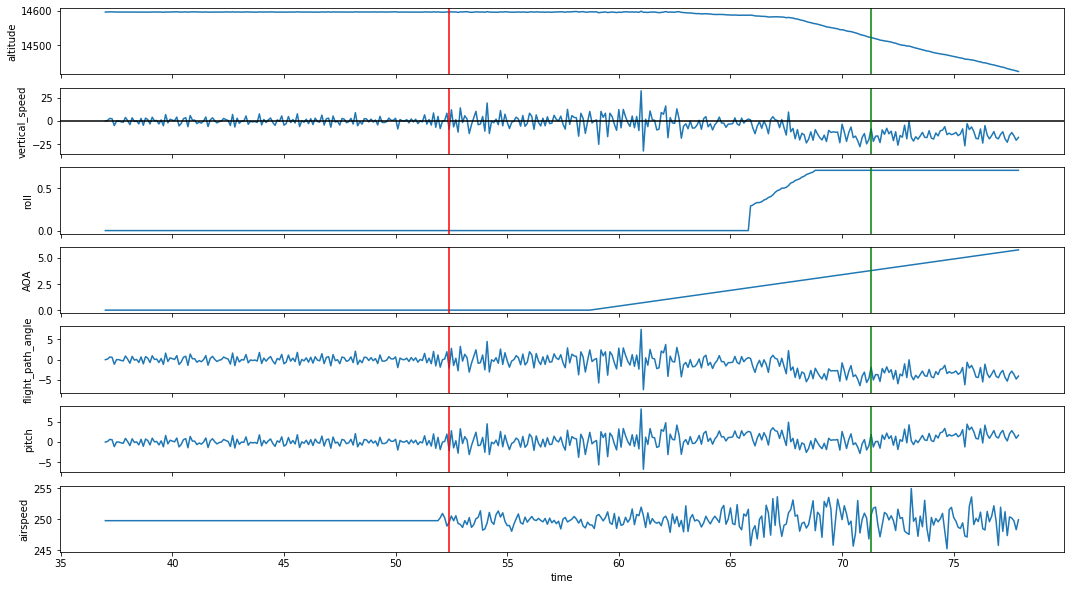

In [1007]:
plot(single_sim_data,52.4,71.3)

In [1000]:
single_sim_data.iloc[143:153]

,name,time_to_buffet,time_from_buffet_to_positive_angle_of_Attack,time_from_buffet_to_uncommanded_descent,time_from_buffet_to_uncommanded_roll,time_from_buffet_to_uncommanded_decent_high,rate_of_change_AOA,mag_of_uncommanded_descent,mag_of_uncommanded_descent_high,mag_of_uncommanded_roll,...,initial_altitude,time,altitude,vertical_speed,roll,AOA,airspeed,flight_path_angle,pitch,stall
143,ABX-SINGLE-SIM,52,58.8,62.9,65.9,67.9,0.03,4.266667,15.716667,17,...,14596,51.3,14596.38,6.64,0.0,0.0,249.80,1.52,1.52,0
144,ABX-SINGLE-SIM,52,58.8,62.9,65.9,67.9,0.03,4.266667,15.716667,17,...,14596,51.4,14596.03,-3.49,0.0,0.0,249.80,-0.80,-0.80,0
145,ABX-SINGLE-SIM,52,58.8,62.9,65.9,67.9,0.03,4.266667,15.716667,17,...,14596,51.5,14596.17,1.49,0.0,0.0,249.80,0.34,0.34,0
146,ABX-SINGLE-SIM,52,58.8,62.9,65.9,67.9,0.03,4.266667,15.716667,17,...,14596,51.6,14595.72,-4.53,0.0,0.0,249.80,-1.04,-1.04,0
147,ABX-SINGLE-SIM,52,58.8,62.9,65.9,67.9,0.03,4.266667,15.716667,17,...,14596,51.7,14596.59,8.65,0.0,0.0,249.80,1.99,1.99,0
148,ABX-SINGLE-SIM,52,58.8,62.9,65.9,67.9,0.03,4.266667,15.716667,17,...,14596,51.8,14595.90,-6.91,0.0,0.0,249.80,-1.58,-1.58,0
149,ABX-SINGLE-SIM,52,58.8,62.9,65.9,67.9,0.03,4.266667,15.716667,17,...,14596,51.9,14596.39,4.90,0.0,0.0,249.80,1.12,1.12,0
150,ABX-SINGLE-SIM,52,58.8,62.9,65.9,67.9,0.03,4.266667,15.716667,17,...,14596,52.0,14595.56,-8.27,0.0,0.0,250.27,-1.89,-1.89,1
151,ABX-SINGLE-SIM,52,58.8,62.9,65.9,67.9,0.03,4.266667,15.716667,17,...,14596,52.1,14595.53,-0.27,0.0,0.0,250.96,-0.06,-0.06,1
152,ABX-SINGLE-SIM,52,58.8,62.9,65.9,67.9,0.03,4.266667,15.716667,17,...,14596,52.2,14595.58,0.51,0.0,0.0,250.26,0.12,0.12,1


In [990]:
print(single_sim_data.stall.tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [819]:
single_sim_data[cols]

,altitude,vertical_speed,roll,AOA,airspeed,flight_path_angle,pitch
0,14595.98,-0.19,0.00,0.00,249.80,-0.04,-0.04
1,14596.04,0.56,0.00,0.00,249.80,0.13,0.13
2,14596.31,2.77,0.00,0.00,249.80,0.63,0.63
3,14596.55,2.35,0.00,0.00,249.80,0.54,0.54
4,14596.04,-5.08,0.00,0.00,249.80,-1.17,-1.17
...,...,...,...,...,...,...,...
405,14429.53,-15.84,0.71,5.64,250.40,-3.63,2.01
406,14428.27,-12.56,0.71,5.67,250.23,-2.88,2.79
407,14426.66,-16.17,0.71,5.70,249.76,-3.71,1.99
408,14424.56,-20.94,0.71,5.73,248.35,-4.84,0.89


In [825]:
scaled_single_sim_data = ssc.transform(single_sim_data[cols])
scaled_single_sim_data_df = pd.DataFrame(scaled_single_sim_data, index=single_sim_data[cols].index, columns=single_sim_data[cols].columns)

In [827]:
scaled_single_sim_data_df

,altitude,vertical_speed,roll,AOA,airspeed,flight_path_angle,pitch
0,-0.855295,0.401405,-0.684258,-0.671656,-1.171065,0.381219,-0.668772
1,-0.855290,0.482027,-0.684258,-0.671656,-1.171065,0.481912,-0.665634
2,-0.855266,0.719594,-0.684258,-0.671656,-1.171065,0.778070,-0.656405
3,-0.855244,0.674446,-0.684258,-0.671656,-1.171065,0.724761,-0.658067
4,-0.855290,-0.124252,-0.684258,-0.671656,-1.171065,-0.288097,-0.689630
...,...,...,...,...,...,...,...
405,-0.870347,-1.280912,1.551227,-0.568929,-1.164198,-1.745191,-0.630934
406,-0.870461,-0.928324,1.551227,-0.568383,-1.166144,-1.300955,-0.616536
407,-0.870607,-1.316386,1.551227,-0.567836,-1.171523,-1.792576,-0.631303
408,-0.870797,-1.829144,1.551227,-0.567290,-1.187660,-2.461892,-0.651606


In [830]:
scaled_single_sim_data_df = pd.concat([scaled_single_sim_data_df,single_sim_data[['name','stall']]], axis = 1)

In [831]:
scaled_single_sim_data_df

,altitude,vertical_speed,roll,AOA,airspeed,flight_path_angle,pitch,name,stall
0,-0.855295,0.401405,-0.684258,-0.671656,-1.171065,0.381219,-0.668772,ABX-SINGLE-SIM,0
1,-0.855290,0.482027,-0.684258,-0.671656,-1.171065,0.481912,-0.665634,ABX-SINGLE-SIM,0
2,-0.855266,0.719594,-0.684258,-0.671656,-1.171065,0.778070,-0.656405,ABX-SINGLE-SIM,0
3,-0.855244,0.674446,-0.684258,-0.671656,-1.171065,0.724761,-0.658067,ABX-SINGLE-SIM,0
4,-0.855290,-0.124252,-0.684258,-0.671656,-1.171065,-0.288097,-0.689630,ABX-SINGLE-SIM,0
...,...,...,...,...,...,...,...,...,...
405,-0.870347,-1.280912,1.551227,-0.568929,-1.164198,-1.745191,-0.630934,ABX-SINGLE-SIM,3
406,-0.870461,-0.928324,1.551227,-0.568383,-1.166144,-1.300955,-0.616536,ABX-SINGLE-SIM,3
407,-0.870607,-1.316386,1.551227,-0.567836,-1.171523,-1.792576,-0.631303,ABX-SINGLE-SIM,3
408,-0.870797,-1.829144,1.551227,-0.567290,-1.187660,-2.461892,-0.651606,ABX-SINGLE-SIM,3


In [833]:
single_flight_features = [] # inputs
single_flight_preds = [] # outputs
for t in range(back_window, len(scaled_single_sim_data_df)):
    # input variables
    single_flight_features.append(scaled_single_sim_data_df[t-back_window:t-1].iloc[:,0:7])

    # output variable
    flight_list = scaled_single_sim_data_df[t:t+forward_window].stall.tolist()
    if (all(elem in flight_list for elem in stall_list) or len(np.where(scaled_single_sim_data_df[t:t+forward_window].stall == 3)[0] > 0)):
        single_flight_preds.append(1)
    else:
        single_flight_preds.append(0)

In [834]:
single_flight_features

[   altitude  vertical_speed      roll       AOA  airspeed  flight_path_angle  \
 0 -0.855295        0.401405 -0.684258 -0.671656 -1.171065           0.381219   
 1 -0.855290        0.482027 -0.684258 -0.671656 -1.171065           0.481912   
 2 -0.855266        0.719594 -0.684258 -0.671656 -1.171065           0.778070   
 3 -0.855244        0.674446 -0.684258 -0.671656 -1.171065           0.724761   
 4 -0.855290       -0.124252 -0.684258 -0.671656 -1.171065          -0.288097   
 5 -0.855292        0.403555 -0.684258 -0.671656 -1.171065           0.381219   
 6 -0.855293        0.407855 -0.684258 -0.671656 -1.171065           0.387142   
 7 -0.855301        0.319708 -0.684258 -0.671656 -1.171065           0.274602   
 8 -0.855314        0.259510 -0.684258 -0.671656 -1.171065           0.197601   
 
       pitch  
 0 -0.668772  
 1 -0.665634  
 2 -0.656405  
 3 -0.658067  
 4 -0.689630  
 5 -0.668772  
 6 -0.668588  
 7 -0.672095  
 8 -0.674494  ,
    altitude  vertical_speed      rol

In [835]:
single_flight_features_vals = np.array([xx.values for xx in single_flight_features])

In [836]:
single_flight_predicted  = lstm_model_forward_200_all_classes.predict_classes(single_flight_features_vals)

In [870]:
np.where(scaled_single_sim_data_df.stall == 3)

(array([323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335,
        336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348,
        349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361,
        362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374,
        375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387,
        388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400,
        401, 402, 403, 404, 405, 406, 407, 408, 409]),)

In [856]:
scaled_single_sim_data_df.iloc[114]

altitude                  -0.855288
vertical_speed             0.353032
roll                      -0.684258
AOA                       -0.671656
airspeed                  -1.171065
flight_path_angle          0.316064
pitch                     -0.670803
name                 ABX-SINGLE-SIM
stall                             0
Name: 114, dtype: object

In [867]:
single_flight_features[115]

,altitude,vertical_speed,roll,AOA,airspeed,flight_path_angle,pitch
115,-0.855320,0.047742,-0.684258,-0.671656,-1.171065,-0.068940,-0.682800
116,-0.855296,0.695945,-0.684258,-0.671656,-1.171065,0.754377,-0.657144
117,-0.855277,0.652947,-0.684258,-0.671656,-1.171065,0.695146,-0.658990
118,-0.855287,0.304659,-0.684258,-0.671656,-1.171065,0.256833,-0.672648
119,-0.855269,0.636822,-0.684258,-0.671656,-1.171065,0.677376,-0.659543
120,-0.855280,0.287459,-0.684258,-0.671656,-1.171065,0.233140,-0.673387
121,-0.855271,0.530401,-0.684258,-0.671656,-1.171065,0.541144,-0.663789
122,-0.855311,-0.045780,-0.684258,-0.671656,-1.171065,-0.187403,-0.686492
123,-0.855266,0.951786,-0.684258,-0.671656,-1.171065,1.074227,-0.647176


In [839]:
single_flight_preds.index(1)

114

In [869]:
np.where(single_flight_preds)[0]

array([114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191,
       192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,
       205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,
       218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230,
       231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,
       244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256,
       257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269,
       270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282,
       283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 29

In [838]:
np.where(single_flight_predicted == 1)[0]

array([143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
       183, 184, 185, 186, 187, 188, 189, 190, 192, 198, 199, 200, 201,
       202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214,
       215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227,
       228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240,
       241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253,
       254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266,
       267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279,
       280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292,
       293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305,
       306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318,
       319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 33

In [871]:
len(scaled_single_sim_data_df)

410

In [875]:
x = np.arange(len(scaled_single_sim_data_df))

In [876]:
x.tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [881]:
len(scaled_single_sim_data_df.stall)

410

In [887]:
single_flight_features.index()

TypeError: index() takes at least 1 argument (0 given)

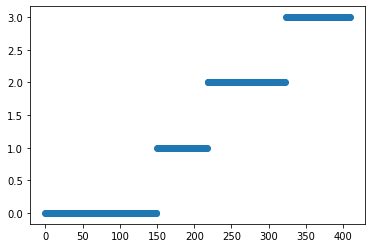

In [888]:
plt.scatter(x.tolist(),scaled_single_sim_data_df.stall.tolist())

In [ ]:
y = np.arange(len(scaled_single_sim_data_df)).tolist()

In [907]:
type(len(back_window))

int

In [910]:
range(0, len(scaled_single_sim_data_df))

range(0, 410)

In [914]:
back_window = 10
forward_window = 200

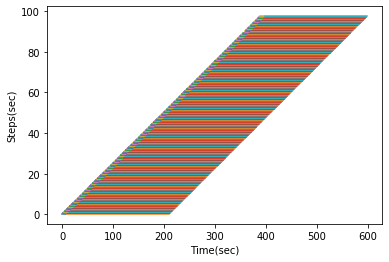

In [1010]:
y=0.25
z=0.25
plt.xlabel('Time(sec)')
plt.ylabel('Steps(sec)')

for t in range(back_window, 400):
    backwindow = np.arange(t-back_window,t-1).tolist()
    forwardwindow = np.arange(t,t+forward_window).tolist()
    y_val = [y]*len(backwindow)
    z_val = [z]*len(forwardwindow)
    plt.plot(backwindow,y_val)
    plt.plot(forwardwindow,z_val)
    y = y+0.25
    z = z+0.25

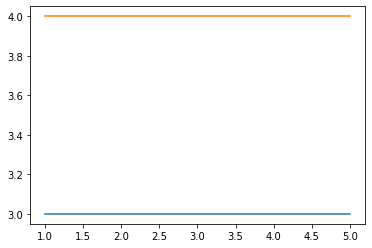

In [927]:
y = [1,2,3,4,5]
x = [3,3,3,3,3]
x1 = [4,4,4,4,4]
  
# plot lines

plt.plot(y, x, label = "line 2")
plt.plot(y, x1, label = "line 2")

In [947]:
single_flight_features = [] # inputs
single_flight_preds = [] # outputs
for t in range(back_window, len(scaled_single_sim_data_df)):
    # input variables
    single_flight_features.append(scaled_single_sim_data_df[t-back_window:t-1].iloc[:,0:7])

    # output variable
    x_df = scaled_single_sim_data_df.iloc[t]
    if (x_df['stall'] > 0):
        single_flight_preds.append(1)
    else:
        single_flight_preds.append(0)

In [948]:
single_flight_features_val = np.array([xx.values for xx in single_flight_features])

In [949]:
flight_class_predicted  = elix_lstm_model.predict_classes(single_flight_features_val)

In [953]:
single_flight_preds.index(1)

140

In [951]:
np.concatenate(flight_class_predicted).tolist().index(1)

143

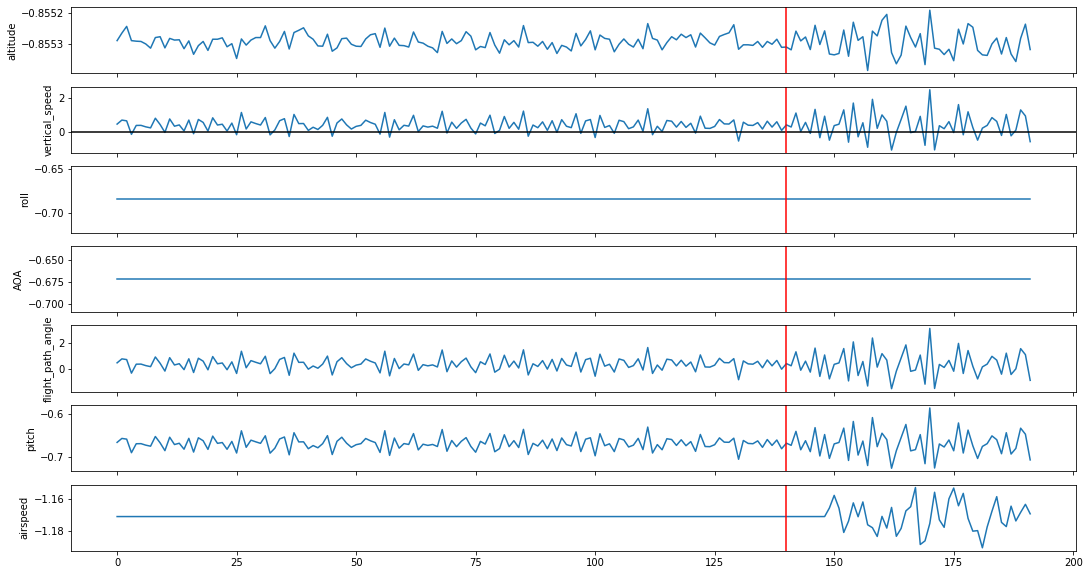

In [968]:
plot(scaled_single_sim_data_df[1:193],140)

In [1005]:
single_sim_data.iloc[343]

name                                            ABX-SINGLE-SIM
time_to_buffet                                              52
time_from_buffet_to_positive_angle_of_Attack              58.8
time_from_buffet_to_uncommanded_descent                   62.9
time_from_buffet_to_uncommanded_roll                      65.9
time_from_buffet_to_uncommanded_decent_high               67.9
rate_of_change_AOA                                        0.03
mag_of_uncommanded_descent                            4.266667
mag_of_uncommanded_descent_high                      15.716667
mag_of_uncommanded_roll                                     17
alt_avg_num_points                                          20
initial_altitude                                         14596
time                                                      71.3
altitude                                              14522.07
vertical_speed                                           -8.39
roll                                                   

In [969]:
single_flight_features = [] # inputs
single_flight_preds = [] # outputs
for t in range(back_window, len(scaled_single_sim_data_df)):
    # input variables
    single_flight_features.append(scaled_single_sim_data_df[t-back_window:t-1].iloc[:,0:7])

    # output variable
    if (len(np.where(scaled_single_sim_data_df[t:t+forward_window].stall == 3)[0] > 0)):
        single_flight_preds.append(1)
    else:
        single_flight_preds.append(0)

In [981]:
np.where(scaled_single_sim_data_df[100:350].stall == 3)[0]

array([223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235,
       236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248,
       249])

In [978]:
scaled_single_sim_data_df.stall.tolist().index(3)

323

In [976]:
single_flight_preds

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [982]:
single_flight_features_val = np.array([xx.values for xx in single_flight_features])

In [983]:
flight_class_predicted  = lstm_model_forward_200_all_classes.predict_classes(single_flight_features_val)

In [984]:
flight_class_predicted

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [985]:
np.concatenate(flight_class_predicted).tolist().index(1)

143